In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
import tensorflow as tf
import seaborn as sns
%matplotlib inline

#Load Data
drive.mount('/content/drive')
filePath = '/content/drive/My Drive/Machine learning project/Message Spam Detection/'
df = pd.read_csv(filePath + 'spam.csv', encoding='Windows-1252')

df.head()

Mounted at /content/drive


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


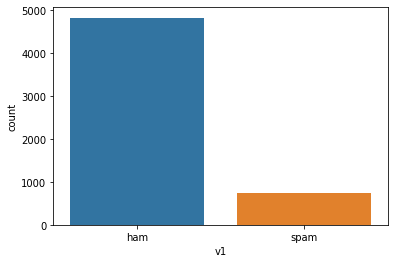

In [ ]:
sns.countplot(data['v1'])
plt.show()

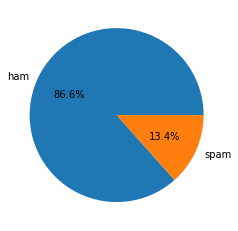

In [ ]:
plt.pie(data['v1'].value_counts(), labels=data['v1'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [ ]:
data_spam = data[data['v1'] == 'spam'].copy()
data_ham = data[data['v1'] == 'ham'].copy()
print("Spam messages: ")
print(data_spam.head(10))
print("Shape: {}".format(data_spam.shape))
print("------------------------------")
print("Ham messages: ")
print(data_ham.head(10))
print("Shape: {}".format(data_ham.shape))

Spam messages: 
      v1                                                 v2
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
5   spam  FreeMsg Hey there darling it's been 3 week's n...
8   spam  WINNER!! As a valued network customer you have...
9   spam  Had your mobile 11 months or more? U R entitle...
11  spam  SIX chances to win CASH! From 100 to 20,000 po...
12  spam  URGENT! You have won a 1 week FREE membership ...
15  spam  XXXMobileMovieClub: To use your credit, click ...
19  spam  England v Macedonia - dont miss the goals/team...
34  spam  Thanks for your subscription to Ringtone UK yo...
42  spam  07732584351 - Rodger Burns - MSG = We tried to...
Shape: (747, 2)
------------------------------
Ham messages: 
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think

[]

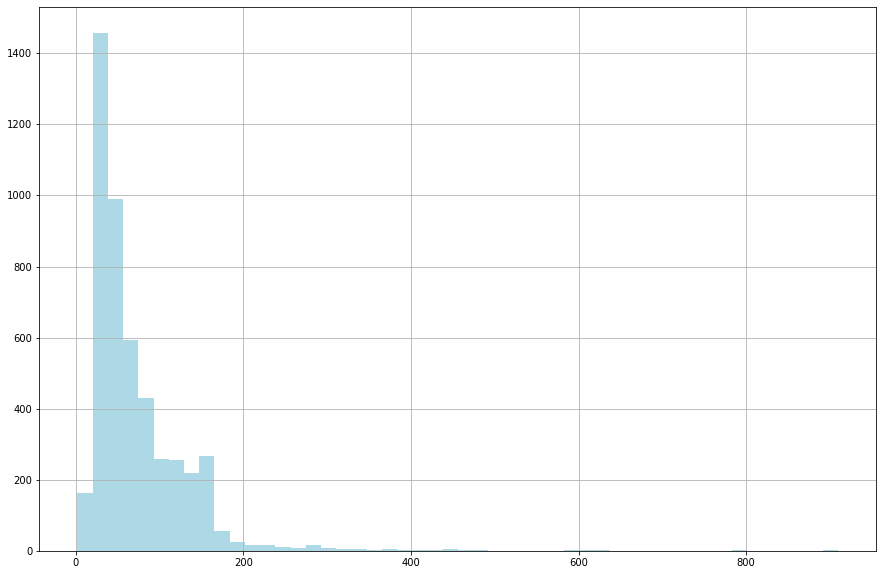

In [ ]:
spam_length = data_spam['v2'].apply(len)
ham_length = data_ham['v2'].apply(len)

spam_length.hist(bins=50, figsize=(15,10), color='orange')
plt.plot()
ham_length.hist(bins=50, figsize=(15,10), color='lightblue')
plt.plot()

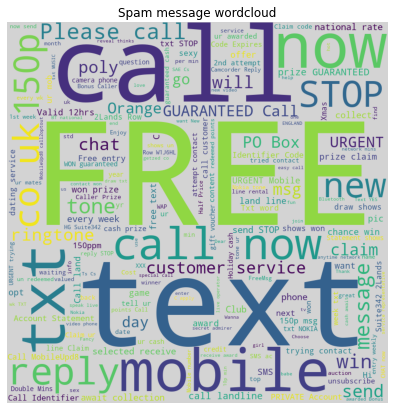

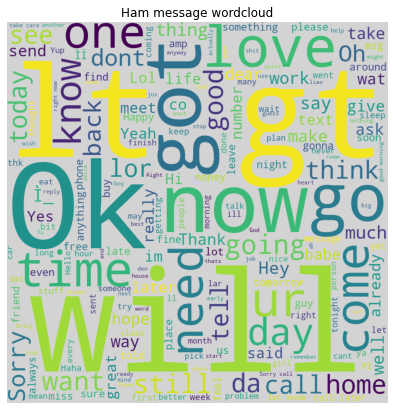

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(df, title):
  stopwords = set(STOPWORDS)
  total_text = ''
  for val in df.v2:
    val = str(val)
    tokens = val.split()
    for token in tokens:
      token = token.lower()
    total_text += " ".join(tokens) + " "
  wordcloud = WordCloud(width = 800, height = 800,
                background_color ='lightgrey',
                stopwords = stopwords,
                min_font_size = 10).generate(total_text)
  plt.figure(figsize=(10,7), frameon=True)
  plt.imshow(wordcloud)
  plt.title(title)
  plt.axis('off')
  plt.show()

show_wordcloud(data_spam, "Spam message wordcloud")
show_wordcloud(data_ham, "Ham message wordcloud")

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

import pickle

In [6]:
X = np.array(data['v2'])
y= (np.array(data['v1']) == 'spam').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
print("X_train: ")
print(X_train[0:5])
print('-----------------------------')
print('y_train: ')
print(y_train[0:5])

X_train: 
["No I'm in the same boat. Still here at my moms. Check me out on yo. I'm half naked."
 '(Bank of Granite issues Strong-Buy) EXPLOSIVE PICK FOR OUR MEMBERS *****UP OVER 300% *********** Nasdaq Symbol CDGT That is a $5.00 per..'
 'They r giving a second chance to rahul dengra.'
 'O i played smash bros  &lt;#&gt;  religiously.'
 'PRIVATE! Your 2003 Account Statement for 07973788240 shows 800 un-redeemed S. I. M. points. Call 08715203649 Identifier Code: 40533 Expires 31/10/04']
-----------------------------
y_train: 
[0 1 0 0 1]


In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)
print(X_train_encoded[0:3])
print(len(tokenizer.word_index))

[[38, 30, 8, 5, 272, 2813, 85, 111, 29, 11, 1894, 326, 10, 52, 18, 328, 30, 324, 1373], [814, 15, 4186, 1918, 1454, 202, 4187, 190, 12, 91, 2818, 44, 196, 1926, 4188, 2958, 4189, 20, 9, 4, 210, 1069, 234], [109, 81, 1261, 4, 662, 334, 2, 7624, 7625]]
8920


In [8]:
max_length = 12
X_train_padded = pad_sequences(X_train_encoded, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_encoded, maxlen=max_length, padding='post')
print(X_train_padded)
print("Shape: {}".format(X_train_padded.shape))

[[ 111   29   11 ...   30  324 1373]
 [  44  196 1926 ...  210 1069  234]
 [ 109   81 1261 ...    0    0    0]
 ...
 [1775   30 2511 ...    0    0    0]
 [ 733 1495 1101 ...    0    0    0]
 [   8  142   21 ...    0    0    0]]
Shape: (4457, 12)


In [9]:
vocab_size = len(tokenizer.word_index) + 1

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 12, 24)            214104    
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               144500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [ ]:
''' def checkString(X):
  count=0
  for i in X:
    for j in i:
      count += 1
      if type(j) == str:
        print("Have string!")
        return
  print("Nostring!")
  print(count)
checkString(X_train_padded)
 '''
print(X_train_padded)
print(X_train_padded.dtype)

[[ 272 2813   85 ...   30  324 1373]
 [  12   91 2818 ...  210 1069  234]
 [ 109   81 1261 ...    0    0    0]
 ...
 [1775   30 2511 ...    0    0    0]
 [ 733 1495 1101 ...    0    0    0]
 [   8  142   21 ...    0    0    0]]
int32


In [10]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
model.fit(x=X_train_padded, 
         y=y_train,
         epochs=50,
         validation_data=(X_test_padded, y_test), verbose=1,
         callbacks=[early_stop]
         )

Epoch 1/50
140/140 [==============================] - 2s 9ms/step - loss: 0.1649 - accuracy: 0.9356 - val_loss: 0.0742 - val_accuracy: 0.9803
Epoch 2/50
140/140 [==============================] - 1s 8ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0774 - val_accuracy: 0.9839
Epoch 3/50
140/140 [==============================] - 1s 8ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.1274 - val_accuracy: 0.9830
Epoch 4/50
140/140 [==============================] - 1s 7ms/step - loss: 2.3038e-05 - accuracy: 1.0000 - val_loss: 0.2342 - val_accuracy: 0.9830
Epoch 5/50
140/140 [==============================] - 1s 8ms/step - loss: 5.3191e-07 - accuracy: 1.0000 - val_loss: 0.2696 - val_accuracy: 0.9839
Epoch 6/50
140/140 [==============================] - 1s 8ms/step - loss: 3.3089e-09 - accuracy: 1.0000 - val_loss: 0.2816 - val_accuracy: 0.9839
Epoch 7/50
140/140 [==============================] - 1s 7ms/step - loss: 4.5806e-09 - accuracy: 1.0000 - val_loss: 0.2899 - val_accurac

[[961   4]
 [ 14 136]]


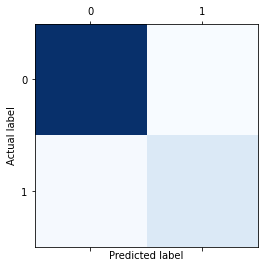

----------------------------
Classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.97      0.91      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

----------------------------
Accuracy score: 0.9838565022421525


In [11]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

y_pred = (model.predict(X_test_padded) > 0.5).astype(int)

def show_cfsmat(actual, pred):
  cfs_mx = confusion_matrix(actual, pred)
  print(cfs_mx)
  plt.matshow(cfs_mx, cmap=plt.cm.Blues)
  plt.xlabel('Predicted label')
  plt.ylabel("Actual label")
  plt.show()

def show_clf_report(actual, pred):
  acc = accuracy_score(actual, pred)
  clf_report = classification_report(actual, pred)
  print("Classification report: ")
  print(clf_report)
  print("----------------------------")
  print("Accuracy score: " + str(acc))

show_cfsmat(y_test, y_pred)
print("----------------------------")
show_clf_report(y_test, y_pred)

In [13]:
model.save('spam_model')
with open(filePath + "tokenizer.pkl", 'wb') as file_2:
  pickle.dump(tokenizer, file_2, pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: spam_model/assets


In [ ]:
s_model = tf.keras.models.load_model('spam_model')
with open(filePath + "tokenizer.pkl", 'rb') as input:
  token = pickle.load(input)


In [ ]:
sms = ["Dear 0776xxxxxxx U've been invited to XCHAT. This is our final attempt to contact u! Txt CHAT to 86688 150p/MsgrcvdHG/Suite342/2Lands/Row/W1J6HL LDN 18yrs"]
sms_encoded = token.texts_to_sequences(sms)
sms_padded = pad_sequences(sms_encoded, maxlen=max_length, padding = 'post')
pred = (s_model.predict(sms_padded) > 0.5).astype(int)
if pred == 1:
  print("SPAM!")
else: print("HAM!")

SPAM!
